# Validación modelo

## División del dataset en entrenamiento y testing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
CSV_URL = "https://raw.githubusercontent.com/dbgjerez/ml-learning/main/ejercicios/c02-regresion-lineal-python/advertising.csv"
data = pd.read_csv(CSV_URL)

> NOTE: se puede dividir el modelo con diferentes mecanismos, ya vistos en la parte de teoria

In [18]:
np.random.seed(2022)
randoms = np.random.randn(len(data))

(array([ 1.,  6., 14., 19., 31., 39., 43., 33.,  6.,  8.]),
 array([-2.95743224, -2.42952011, -1.90160798, -1.37369585, -0.84578372,
        -0.31787159,  0.21004054,  0.73795267,  1.2658648 ,  1.79377692,
         2.32168905]),
 <BarContainer object of 10 artists>)

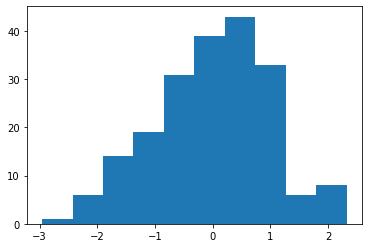

In [19]:
plt.hist(randoms)

In [25]:
training = data[(randoms<0.8)]
testing = data[~(randoms<0.8)]
len(training), len(testing)

(159, 41)

In [28]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [29]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     783.1
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           4.44e-82
Time:                        12:49:17   Log-Likelihood:                -293.60
No. Observations:                 159   AIC:                             593.2
Df Residuals:                     156   BIC:                             602.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0591      0.306     10.003      0.000       2.455       3.663
TV             0.0444      0.001     31.189      0.000       0.042       0.047
Radio          0.1918      0.008     22.610      0.000       0.175       0.209
==============================================================================
Omnibus:                       25.328   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.812
Skew:                          -1.013   Prob(JB):                     1.24e-07
Kurtosis:                       3.835   Cond. No.                         432.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Modelo resultante: ```sales = 3.0591 + 0.0444 * TV + 0.1918 * Radio```

## Validación del modelo con el conjunto de testing

In [30]:
sales_pred = lm.predict(testing)

In [34]:
SSD = sum((testing["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(testing)-2-1))
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.1604770824813812

El modelo es bastante bueno ya que tanto en testing como en el modelo da resultados similares. Cambia algo porque el csv no es muy extenso